In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/sample_data/Walmart Data Analysis and Forcasting.csv')


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(6435, 8)

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
import numpy as np
df['log_weekly_sales'] = np.log1p(df['Weekly_Sales'])


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_weekly_sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292967
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158908
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862


In [ ]:
df['Weekly_Sales'].describe()

,Weekly_Sales
count,6.435000e+03
mean,1.046965e+06
std,5.643666e+05
min,2.099862e+05
25%,5.533501e+05
50%,9.607460e+05
75%,1.420159e+06
max,3.818686e+06


| Metric  | Value         | Meaning                          |
| ------- | ------------- | -------------------------------- |
| Mean    | **1,046,965** | Avg weekly sales ≈ **10.5 lakh** |
| Median  | **960,746**   | Typical store sells ~9.6 lakh    |
| Std Dev | **564,367**   | Very high variability            |
| Min     | **209,986**   | Lowest sales week                |
| Max     | **3,818,686** | Peak sales (likely holidays)     |


In [ ]:
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

Why time features?

1.Sales depend on seasonality

2.Holidays don’t occur randomly

3.Models need numeric signals

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_weekly_sales,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292967,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158908,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,13.477482,39,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,13.505523,40,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,13.506898,41,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,13.484401,42,10,2012


In [ ]:
df.shape

(6435, 12)

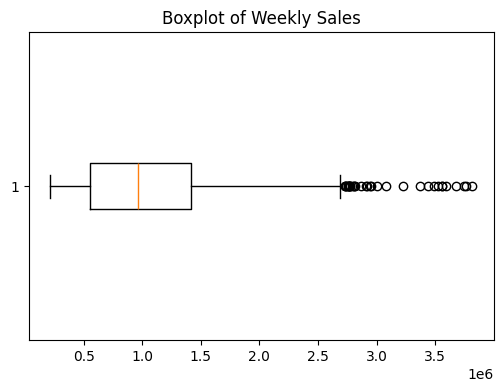

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df['Weekly_Sales'], vert=False)
plt.title('Boxplot of Weekly Sales')
plt.show()


<Axes: ylabel='Resid'>

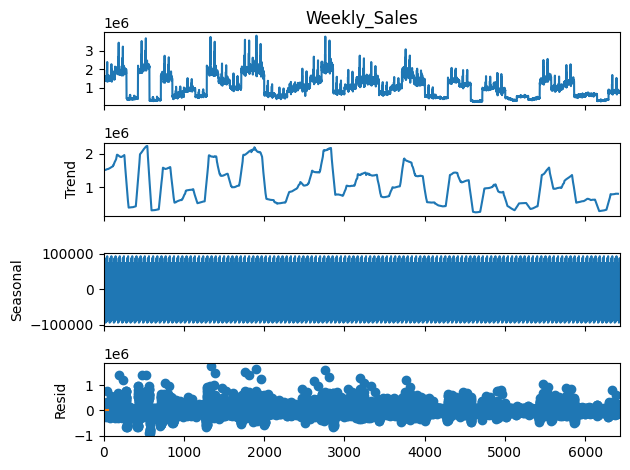

In [ ]:
!pip install statsmodels
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose as ssd
ssd(df.Weekly_Sales,period=52).plot()
ssd(df['Weekly_Sales'], model='multiplicative', period=52).seasonal[:52].plot()



In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_weekly_sales,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292967,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158908,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,9,3,2010


In [ ]:
target = 'log_weekly_sales'


In [ ]:
df['week'] = df['week'].astype(int)


In [ ]:
import statsmodels.api as sm

# Define the features to be used for the model
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week', 'month', 'year']

# Split the data using only the selected numeric features
x_train, x_test, y_train, y_test = train_test_split(df[features], df.log_weekly_sales, test_size=0.1, random_state=20)

# Convert x_train DataFrame to a NumPy array before adding the constant
x_train_with_const = sm.add_constant(x_train.values, prepend=False)
mod1=sm.OLS(y_train, x_train_with_const).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:       log_weekly_sales   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     87.97
Date:                Tue, 30 Dec 2025   Prob (F-statistic):          5.23e-154
Time:                        04:54:59   Log-Likelihood:                -4784.2
No. Observations:                5791   AIC:                             9588.
Df Residuals:                    5781   BIC:                             9655.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0143      0.001    -24.518      0.0

Linear Regression on Test Set

In [ ]:
# Convert x_train DataFrame to a NumPy array before adding the constant
x_test_with_const = sm.add_constant(x_test.values, prepend=False)
mod2=sm.OLS(y_test, x_test_with_const).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:       log_weekly_sales   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     11.46
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           9.72e-17
Time:                        04:55:01   Log-Likelihood:                -511.87
No. Observations:                 644   AIC:                             1044.
Df Residuals:                     634   BIC:                             1088.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0156      0.002     -8.972      0.0

Linear Regression captures only a small portion of sales variability, indicating that Walmart sales are driven by complex, non-linear and seasonal factors

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train,y_train)
lassocv.alpha_

np.float64(0.002258378307232625)

In [ ]:
# We can change value of alpha its on us
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.002) # as we increase the value of alpha, Lasso becomes more aggressive (i.e. it minimizes coeff. more)
lasso.fit(x_train,y_train)
lasso.coef_

array([-0.01428408,  0.        , -0.00289478,  0.03171609, -0.00196124,
       -0.01286239, -0.00642337,  0.04136105, -0.        ])

In [ ]:
y_pred = mod1.predict(x_test_with_const)
residuals = (y_pred-y_test)

In [ ]:
# SSE: Sum Square of Error
# SST: Sum Square of Total Variation
residuals=y_pred-y_test
SSE = sum(residuals**2)   # unexplained variation
SST = sum((y_test-np.mean(y_test))**2)   # total variation
SSR = SST - SSE  # sum of square due to regression or explained variation

#SSR: Sum of Square due to Regression

R2_Test=SSR/SST
R2_Test=1-SSE/SST


In [ ]:
R2_Test

0.13119587413919898

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dt=dtr.fit(x_train,y_train)

In [ ]:
dtr.score(x_train,y_train)

1.0

In [ ]:
dtr.score(x_test,y_test)

0.9705292540566974

To avoid overfitting we will now use some hyperparamters

In [ ]:
my_params={'criterion':['squared_error', 'friedman_mse'],'max_depth':[3,4,5,6,7,10,15],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(dtr,param_grid=my_params,cv=5,scoring='accuracy')

In [ ]:
grid_model.fit(x_train,y_train)
grid_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
dtr_final = DecisionTreeRegressor(criterion='squared_error',
 max_depth=6,
 min_samples_leaf= 2,
 min_samples_split=2)

In [ ]:
dtr_final.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=2)

In [ ]:
dtr_final.score(x_train,y_train)

0.860714763661353

In [ ]:
dtr_final.score(x_test,y_test)

0.8213306186392503

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9970411579827803
0.9848175360692659


In [ ]:
myparams={
    'n_estimators':[10,20,50,100,200],
    'criterion':['gini','log_loss','entropy'],

}

In [ ]:
grid=GridSearchCV(rfr,param_grid=my_params,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

KeyboardInterrupt: 

In [ ]:
rfr_final = RandomForestRegressor(criterion='squared_error',
 max_depth=6,
 min_samples_leaf= 4,
 min_samples_split=3)

In [ ]:
rfr_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=3)

In [ ]:
rfr_final.score(x_train,y_train)

0.8682062452743455

In [ ]:
rfr_final.score(x_test,y_test)

0.8432449157463775

Random Forest (Feature Importance)

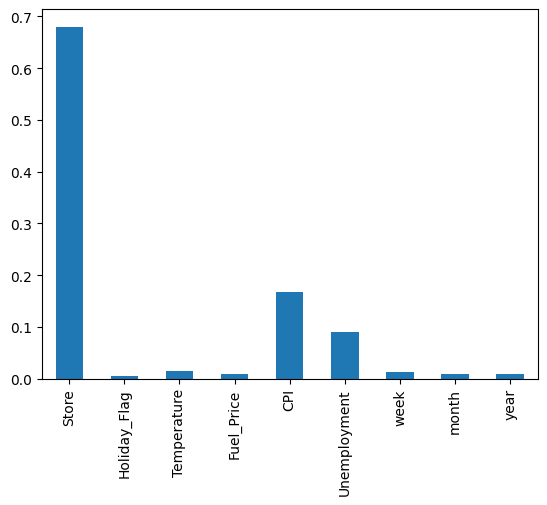

In [ ]:
x = df.drop(['log_weekly_sales', 'Date','Weekly_Sales'], axis=1)
y= df.log_weekly_sales
from sklearn.ensemble import ExtraTreesRegressor # Changed from ExtraTreesClassifier
mod= ExtraTreesRegressor() # Changed from ExtraTreesClassifier
mod.fit(x,y)
mod.feature_importances_
feat_imp = pd.Series(mod.feature_importances_,index=x.columns)
feat_imp.plot(kind='bar')
plt.show()

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_weekly_sales,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292967,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158908,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,9,3,2010


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.3 MB/s eta 0:00:00


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train, y_train))
print(gbr.score(x_test, y_test))

0.9160417413565698
0.9083111682384696


In [ ]:
xgb = XGBRegressor()
mod1 = xgb.fit(x_train, y_train)
print(xgb.score(x_train, y_train))
print(xgb.score(x_test, y_test))

0.99768647034688
0.9911399137574318


In [ ]:
xgb = XGBRegressor(learning_rate=0.02, reg_lambda=1, reg_alpha=0.3,gamma=2,max_depth=3)
mod1 = xgb.fit(x_train, y_train)
print(xgb.score(x_train, y_train))
print(xgb.score(x_test, y_test))

0.5968376714043633
0.6020206492990052


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=30, learning_rate=0.06, loss='linear')
mod1 = abr.fit(x_train, y_train)
print(abr.score(x_train, y_train))
print(abr.score(x_test, y_test))

0.48849223924754803
0.4877451967144296


So, Gradient Boosting gives better result.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(criterion='squared_error',
 max_depth=6,
 min_samples_leaf= 2,
 min_samples_split=2),
    "Random Forest": RandomForestRegressor(criterion='squared_error',
 max_depth=6,
 min_samples_leaf= 4,
 min_samples_split=3),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(learning_rate=0.02, reg_lambda=1, reg_alpha=0.3,gamma=2,max_depth=3),
    "AdaBoostRegressor": AdaBoostRegressor(n_estimators=30, learning_rate=0.06, loss='linear')
}


In [ ]:
scores = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores[name] = r2_score(y_test, y_pred)



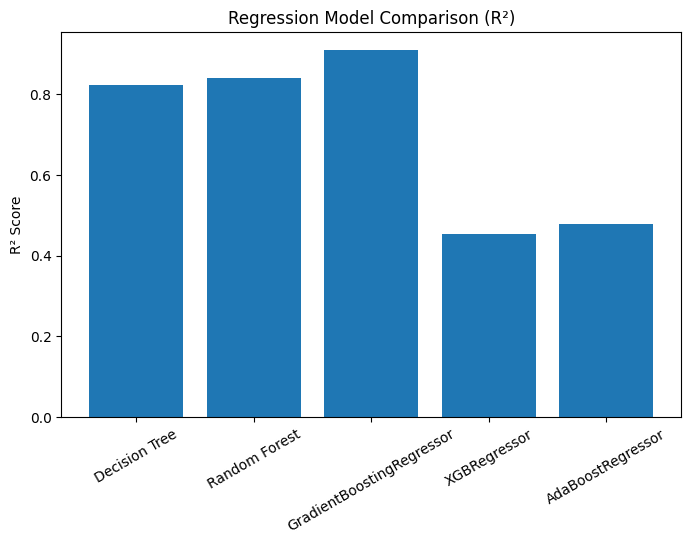

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values())
plt.ylabel("R² Score")
plt.title("Regression Model Comparison (R²)")
plt.xticks(rotation=30)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_scores = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))


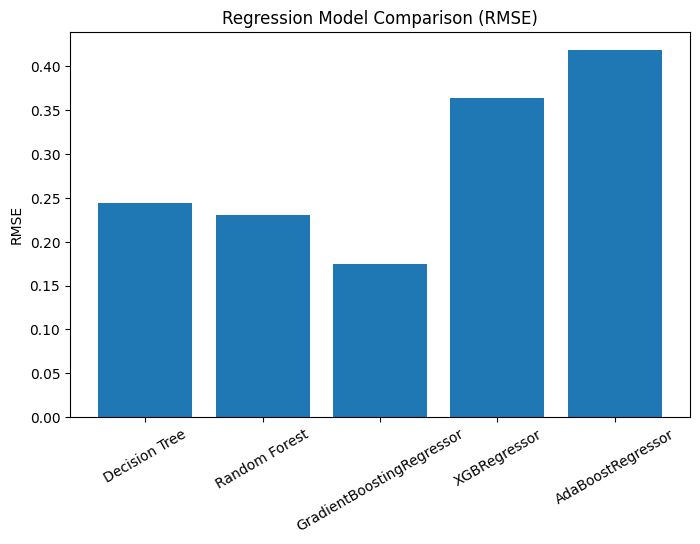

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.ylabel("RMSE")
plt.title("Regression Model Comparison (RMSE)")
plt.xticks(rotation=30)
plt.show()


Smaller the RMSE, better the model.